In [1]:
import librosa
import wave, os, glob
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler

from keras import models
from keras import layers

Using TensorFlow backend.


# Creating CSV file

In [2]:
"""

creating a list of headings

"""

header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [3]:
clean_filenames = glob.glob('clean_trainset_28/*')

In [4]:
noisy_filenames = glob.glob('noisy_trainset_28/*')

In [5]:
total_filenames = clean_filenames[:2500] + noisy_filenames[:2500]
len(total_filenames)

5000

In [6]:
print(len(clean_filenames))
print(len(noisy_filenames))

11572
11572


# Adding 28 Speaker Clean Data

In [7]:
sr = 48000

"""

opening and writing the headings to a csv file

"""

file = open('28spk_data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)


"""

Below code selects every file inside both folders. Extracting features from every wav file
and storing them into a csv file

0 - 4000

"""


for filename in clean_filenames[:4000]:
    y, sr = librosa.load(filename, sr=sr)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rmse = librosa.feature.rms(y=y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
    for e in mfcc:
        to_append += f' {np.mean(e)}'
    file = open('28spk_data.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

In [8]:
"""
Below code selects every file inside both folders. Extracting features from every wav file
and storing them into a csv file

4,000 - 8,000

"""


for filename in clean_filenames[4000:8000]:
    y, sr = librosa.load(filename, sr=sr)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rmse = librosa.feature.rms(y=y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
    for e in mfcc:
        to_append += f' {np.mean(e)}'
    file = open('28spk_data.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

In [9]:
"""
Below code selects every file inside both folders. Extracting features from every wav file
and storing them into a csv file

8,000 - 11,572

"""


for filename in clean_filenames[8000:11572]:
    y, sr = librosa.load(filename, sr=sr)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rmse = librosa.feature.rms(y=y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
    for e in mfcc:
        to_append += f' {np.mean(e)}'
    file = open('28spk_data.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

In [10]:
clean_files_raw = pd.read_csv('28spk_data.csv')

In [11]:
clean_files = clean_files_raw[:]

In [12]:
clean_files.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11572 entries, 0 to 11571
Data columns (total 28 columns):
filename              11572 non-null object
chroma_stft           11572 non-null float64
rmse                  11572 non-null float64
spectral_centroid     11572 non-null float64
spectral_bandwidth    11572 non-null float64
rolloff               11572 non-null float64
zero_crossing_rate    11572 non-null float64
mfcc1                 11572 non-null float64
mfcc2                 11572 non-null float64
mfcc3                 11572 non-null float64
mfcc4                 11572 non-null float64
mfcc5                 11572 non-null float64
mfcc6                 11572 non-null float64
mfcc7                 11572 non-null float64
mfcc8                 11572 non-null float64
mfcc9                 11572 non-null float64
mfcc10                11572 non-null float64
mfcc11                11572 non-null float64
mfcc12                11572 non-null float64
mfcc13                11572 non-null 

# Adding 28 Speaker Noisy Data

In [14]:
"""

Below code selects every file inside both folders. Extracting features from every wav file
and storing them into a csv file

0 - 4,000

"""

for filename in noisy_filenames[:4000]:
    y, sr = librosa.load(filename, sr=sr)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rmse = librosa.feature.rms(y=y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
    for e in mfcc:
        to_append += f' {np.mean(e)}'
    file = open('28spk_data.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

In [15]:
"""

Below code selects every file inside both folders. Extracting features from every wav file
and storing them into a csv file

4,000 - 8,000

"""

for filename in noisy_filenames[4000:8000]:
    y, sr = librosa.load(filename, sr=sr)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rmse = librosa.feature.rms(y=y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
    for e in mfcc:
        to_append += f' {np.mean(e)}'
    file = open('28spk_data.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

In [16]:
"""

Below code selects every file inside both folders. Extracting features from every wav file
and storing them into a csv file

8,000 - 11,572

"""

for filename in noisy_filenames[8000:11572]:
    y, sr = librosa.load(filename, sr=sr)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rmse = librosa.feature.rms(y=y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
    for e in mfcc:
        to_append += f' {np.mean(e)}'
    file = open('28spk_data.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

In [20]:
clean_noisy_files_raw = pd.read_csv('28spk_data.csv')

In [21]:
clean_noisy_files = clean_noisy_files_raw[:]

In [22]:
clean_noisy_files.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23144 entries, 0 to 23143
Data columns (total 28 columns):
filename              23144 non-null object
chroma_stft           23144 non-null float64
rmse                  23144 non-null float64
spectral_centroid     23144 non-null float64
spectral_bandwidth    23144 non-null float64
rolloff               23144 non-null float64
zero_crossing_rate    23144 non-null float64
mfcc1                 23144 non-null float64
mfcc2                 23144 non-null float64
mfcc3                 23144 non-null float64
mfcc4                 23144 non-null float64
mfcc5                 23144 non-null float64
mfcc6                 23144 non-null float64
mfcc7                 23144 non-null float64
mfcc8                 23144 non-null float64
mfcc9                 23144 non-null float64
mfcc10                23144 non-null float64
mfcc11                23144 non-null float64
mfcc12                23144 non-null float64
mfcc13                23144 non-null 

# Cleaning the 28 Speaker Data

In [27]:
raw = pd.read_csv('28spk_data.csv')

In [28]:
data = raw[:]

In [29]:
data.sample(5)

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
14258,noisy_trainset_28/p287_265.wav,0.542186,0.055422,6872.434412,7497.795005,16533.733259,0.099667,-252.200943,81.607407,41.572041,...,3.080143,0.842458,1.269279,0.873045,6.491261,0.924503,1.968688,-0.643213,0.438778,NaN
13770,noisy_trainset_28/p279_399.wav,0.532378,0.040288,2784.830241,3984.006069,5550.764906,0.047047,-324.532379,150.839355,-0.964546,...,1.327030,1.094016,-0.051818,-1.919815,3.051743,0.101083,2.350171,1.988127,2.506015,NaN
11491,clean_trainset_28/p243_174.wav,0.531612,0.028062,2879.413591,4047.481166,6062.891408,0.047123,-430.659943,121.293335,8.742786,...,1.059086,1.733309,-0.332969,-4.634017,4.955334,6.859700,3.844966,4.006335,1.654880,NaN
19846,noisy_trainset_28/p243_089.wav,0.464737,0.062429,3527.077116,5288.964475,8053.442797,0.049402,-232.906113,132.213852,22.154440,...,-2.964419,4.532233,-1.078372,-1.597107,7.509468,0.286838,4.361313,2.459123,2.798868,NaN
5399,clean_trainset_28/p282_183.wav,0.512653,0.037241,3617.724327,4809.851047,8029.455236,0.053335,-417.676514,106.744125,11.309994,...,3.495880,-0.723355,2.824453,1.557511,5.650749,7.452435,5.097755,2.678947,1.650498,NaN


In [30]:
data.loc[:11572, 'label'] = 'clean'
data.loc[11572:23144, 'label'] = 'noisy'
data.drop(columns=['filename'], inplace=True)

In [31]:
data.sample(10)

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
16770,0.587732,0.039892,2036.637640,3440.046670,4017.762382,0.023127,-336.834991,163.122025,-7.382974,27.305593,...,-1.620144,6.097378,2.820686,-1.385319,7.445633,2.769529,7.351555,3.950179,2.639145,noisy
13249,0.481204,0.049380,3543.771134,4843.508076,7609.397777,0.054075,-301.404388,130.364380,16.347050,25.645855,...,-1.668447,1.851461,-3.320331,-2.230459,4.501845,0.803982,2.087426,2.516221,2.349015,noisy
17786,0.585121,0.052093,2840.853957,4610.744089,6742.105263,0.026920,-305.510468,128.536026,7.148754,27.587818,...,-1.234255,2.484422,4.036513,5.147472,8.244612,1.414870,6.292882,2.195626,2.601966,noisy
2165,0.564592,0.043733,3296.579153,5270.675099,7344.932432,0.041829,-415.661743,117.892311,18.294868,-1.413048,...,6.516280,5.298056,3.997051,6.684927,3.981073,3.961036,7.776460,-2.817921,2.608601,clean
18096,0.553156,0.050131,2704.091983,4815.824596,5270.952722,0.025332,-401.197693,121.124977,31.796778,21.176693,...,4.306190,-0.909548,0.756739,3.670705,3.323117,3.793585,6.084056,2.858170,2.079965,noisy
16471,0.512552,0.079777,2750.439218,4049.467206,4485.143175,0.040562,-348.063293,125.178841,25.124718,17.835197,...,3.174636,2.529017,7.808466,9.642412,8.399709,6.106608,4.379020,5.946018,-0.352054,noisy
12538,0.647343,0.059431,2663.149505,4714.637783,6041.374362,0.023766,-379.764832,128.660843,25.978798,31.081997,...,6.517072,0.966489,-1.366649,1.749095,6.400992,4.582907,0.554323,6.808609,2.167716,noisy
5396,0.679160,0.021246,3663.455553,5807.609560,9678.515625,0.026093,-526.164734,85.653648,16.500048,16.419291,...,5.670100,4.137560,5.301795,5.128245,6.974859,2.737648,5.163618,6.731500,2.993042,clean
12244,0.596100,0.037858,2386.339493,3841.322264,4035.856214,0.034517,-405.853943,128.113235,16.152216,17.460419,...,5.250057,-0.164499,0.542090,2.390980,6.543499,3.538058,1.757907,6.909842,1.801644,noisy
10623,0.555899,0.036459,3779.386120,5431.689262,9038.717196,0.042464,-428.176270,90.759888,14.196130,13.324111,...,2.786685,2.281031,3.356997,-0.273339,2.193359,5.937977,4.740649,0.523773,3.104709,clean


In [32]:
data.to_csv('28spk_clean_data.csv')

# Training the 28 Speaker Model

In [33]:
type_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(type_list)

In [34]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
print(len(X_train))
print(len(y_train))

18515
18515


In [37]:
print(len(X_test))
print(len(y_test))

4629
4629


In [38]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))

model.add(layers.Dense(128, activation='relu'))

# model.add(layers.Dense(32, activation='relu'))

# model.add(layers.Dense(16, activation='sigmoid'))

model.add(layers.Dense(2, activation='softmax'))

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               6912      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 258       
Total params: 40,066
Trainable params: 40,066
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=128,
                   )

Epoch 1/20
18515/18515 [==============================] - 1s 31us/step - loss: 0.0902 - accuracy: 0.9660
Epoch 2/20
18515/18515 [==============================] - 0s 16us/step - loss: 0.0195 - accuracy: 0.9938
Epoch 3/20
18515/18515 [==============================] - 0s 16us/step - loss: 0.0136 - accuracy: 0.9954
Epoch 4/20
18515/18515 [==============================] - 0s 20us/step - loss: 0.0101 - accuracy: 0.9964
Epoch 5/20
18515/18515 [==============================] - 0s 18us/step - loss: 0.0092 - accuracy: 0.9971
Epoch 6/20
18515/18515 [==============================] - 0s 20us/step - loss: 0.0066 - accuracy: 0.9975
Epoch 7/20
18515/18515 [==============================] - 0s 15us/step - loss: 0.0065 - accuracy: 0.9979
Epoch 8/20
18515/18515 [==============================] - 0s 16us/step - loss: 0.0052 - accuracy: 0.9982
Epoch 9/20
18515/18515 [==============================] - 0s 16us/step - loss: 0.0039 - accuracy: 0.9990
Epoch 10/20
18515/18515 [==============================

Text(0, 0.5, 'Loss')

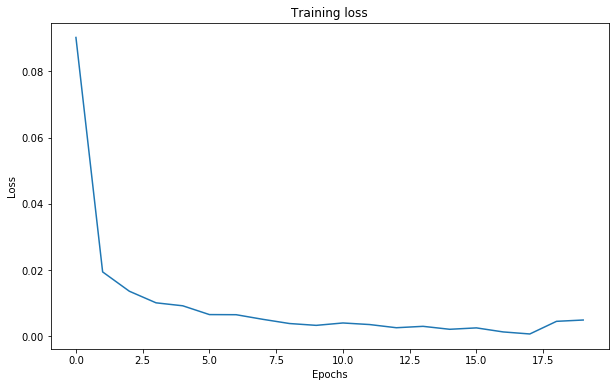

In [42]:
plt.figure(figsize=(10,6))
plt.title("Training loss")
plt.plot( history.history["loss"] )
plt.xlabel("Epochs")
plt.ylabel("Loss")

Text(0, 0.5, 'Accuracy')

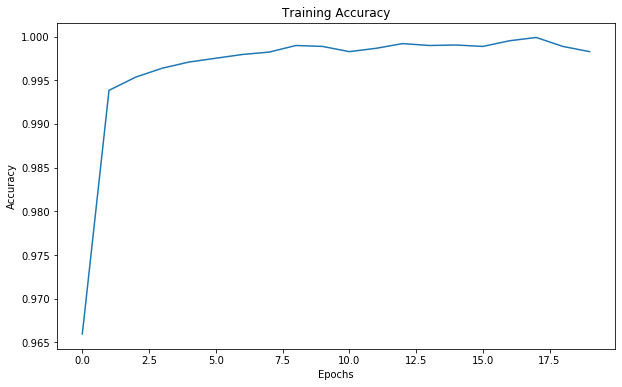

In [43]:
plt.figure(figsize=(10,6))
plt.title("Training Accuracy")
plt.plot( history.history['accuracy'] )
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

In [44]:
test_loss, test_acc = model.evaluate(X_test,y_test)

4629/4629 [==============================] - 0s 29us/step


In [45]:
print('test_acc: ',test_acc)
print('test_loss: ',test_loss)

test_acc:  0.9954633712768555
test_loss:  0.010576681140647267


# Logistic and Random Forest Classification

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, f1_score, auc, log_loss

In [47]:
'''

Fitting Logistic Regression Model

'''

# for i in [0.01, 0.05, 0.25, 0.5, 1]:
lr = LogisticRegression(C=0.1)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_probs = lr.predict_proba(X_test)

print("Accuracy: ", accuracy_score(y_test, lr_pred))
print("Confusion Matrix: ",(confusion_matrix(y_test, lr_pred)))
print("Report: ",(classification_report(y_test, lr_pred)))

Accuracy:  0.9889825016202204
Confusion Matrix:  [[2322   12]
 [  39 2256]]
Report:                precision    recall  f1-score   support

           0       0.98      0.99      0.99      2334
           1       0.99      0.98      0.99      2295

    accuracy                           0.99      4629
   macro avg       0.99      0.99      0.99      4629
weighted avg       0.99      0.99      0.99      4629



In [48]:
'''

Calculate Log-Loss

'''

print(log_loss(y_test, lr_probs, normalize=False))
print(log_loss(y_test, lr_probs))

211.99989616361552
0.04579820612737427


In [49]:
'''

Fitting Random Forest Classifier

'''

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, rf_pred))

Accuracy:  0.9917908835601642


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.999
Random Forest: ROC AUC=0.999


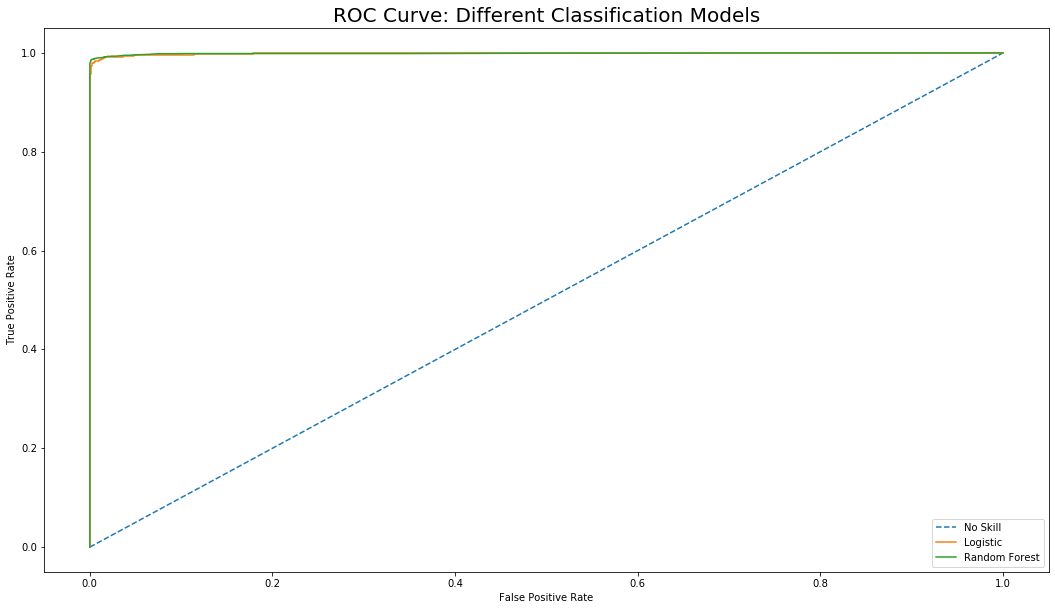

In [50]:
'''

Plot ROC curve after fitting a model

'''

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# Predict Probabilities
lr_probs = lr.predict_proba(X_test)
rf_probs = rf.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
rf_probs = rf_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('Random Forest: ROC AUC=%.3f' % (rf_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

# plot the roc curve for the model
f1,ax1 = plt.subplots(figsize =(18,10))
ax1.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
ax1.plot(lr_fpr, lr_tpr, label='Logistic')
ax1.plot(rf_fpr, rf_tpr, label='Random Forest')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.title('ROC Curve: Different Classification Models', fontsize=20)
# plt.savefig('ROC_classification_models.png')
plt.show();

Logistic: f1=0.989 auc=0.999
Random Forest: f1=0.992 auc=0.999


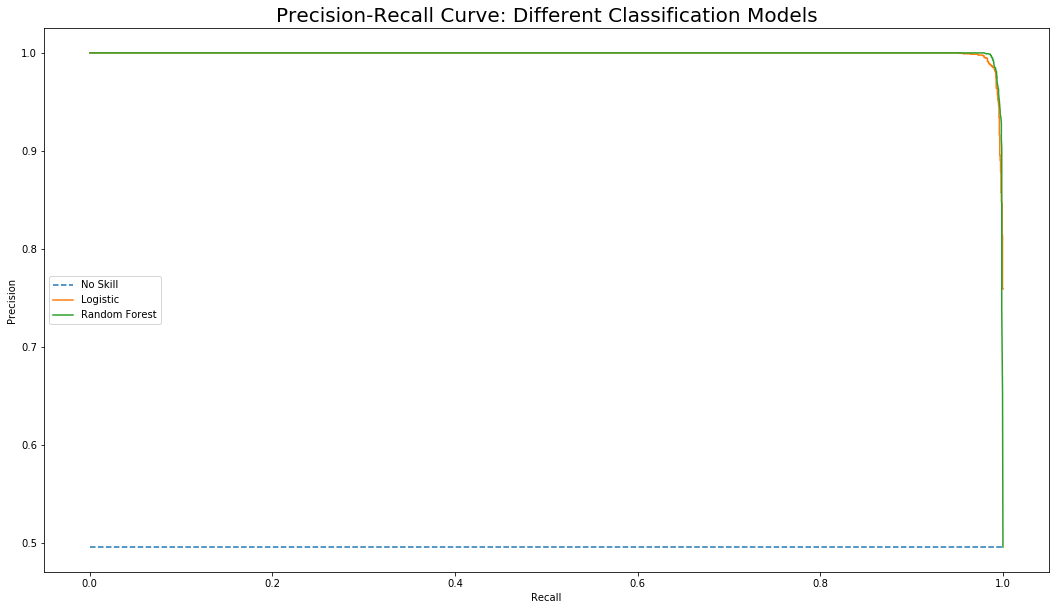

In [51]:
'''

Plot Precision-Recall curve after fitting a model

'''

# predict class values

lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, lr_pred), auc(lr_recall, lr_precision)

rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_probs)
rf_f1, rf_auc = f1_score(y_test, rf_pred), auc(rf_recall, rf_precision)

# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
print('Random Forest: f1=%.3f auc=%.3f' % (rf_f1, rf_auc))

# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)

f2,ax2 = plt.subplots(figsize =(18,10))
ax2.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
ax2.plot(lr_recall, lr_precision, label='Logistic')
ax2.plot(rf_recall, rf_precision, label='Random Forest')


# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.legend()
plt.title('Precision-Recall Curve: Different Classification Models', fontsize=20)
# plt.savefig('precision_recall_classification_models.png')
plt.show();

In [53]:
### THIS FILE ENDS HERE ###